In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
male_data = data[data.Sex=='M']
female_data = data[data.Sex=='F']

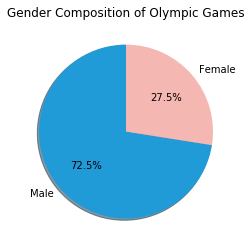

In [73]:
pie_slices = []
pie_slices.append(len(male_data)/len(data))
pie_slices.append(len(female_data)/len(data))
labels = ['Male','Female']
plt.pie(pie_slices, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['#219AD8','#F5B7B1'])
plt.title('Gender Composition of Olympic Games')
plt.show()

In [5]:
male_data.describe()

,Unnamed: 0,ID,Age,Height,Weight,Year
count,196594.000000,196594.000000,196594.000000,196594.000000,196594.000000,196594.000000
mean,134259.785065,67601.598304,26.172716,178.896640,75.254759,1973.046064
std,78288.679740,39036.820069,6.342165,7.999185,11.234671,31.127867
min,0.000000,1.000000,10.000000,127.000000,28.000000,1896.000000
25%,66209.250000,33868.250000,22.000000,175.000000,70.000000,1952.000000
50%,133625.000000,67271.500000,25.000000,179.000000,74.000000,1980.000000
75%,202346.750000,101638.000000,29.000000,183.000000,79.000000,2000.000000
max,271115.000000,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6]:
female_data.describe()

,Unnamed: 0,ID,Age,Height,Weight,Year
count,74522.000000,74522.000000,74522.000000,74522.000000,74522.000000,74522.000000
mean,138980.958442,69956.722887,23.734401,167.855103,59.915032,1992.445748
std,78098.126752,38932.561177,5.778777,8.347283,9.671605,20.458993
min,4.000000,5.000000,11.000000,127.000000,25.000000,1900.000000
25%,71837.000000,36558.500000,20.000000,163.000000,55.000000,1984.000000
50%,139659.000000,70128.000000,23.000000,168.000000,59.000000,1998.000000
75%,206265.750000,103534.750000,27.000000,173.000000,65.000000,2008.000000
max,271110.000000,135568.000000,74.000000,213.000000,167.000000,2016.000000


## Are the height, weight, and age of male and female athletes substantially different?

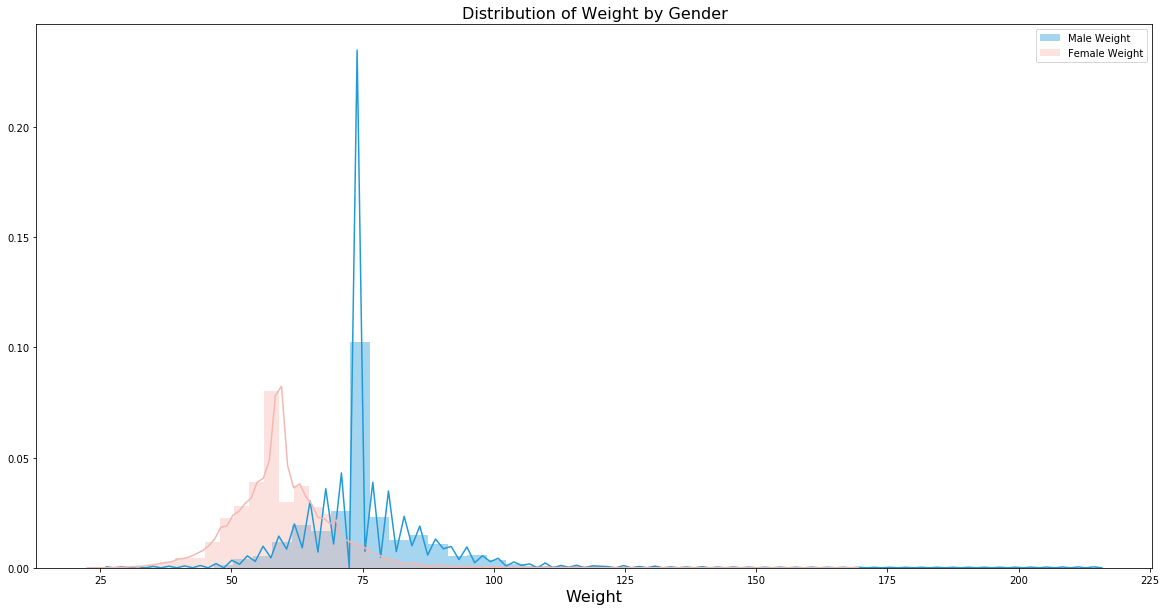

In [65]:
plt.figure(figsize=(20, 10))
sns.distplot(male_data['Weight'], label='Male Weight', color='#219AD8')
sns.distplot(female_data['Weight'], label='Female Weight', color='#F5B7B1')
plt.title('Distribution of Weight by Gender', fontsize=16)
plt.xlabel('Weight', fontsize=16)
plt.legend()
plt.show()

In [41]:
from scipy import stats
print('Normality of male weight distribution: ', stats.normaltest(male_data.Weight))
print('Normality of female weight distribution: ', stats.normaltest(female_data.Weight))

Normality of male weight distribution:  NormaltestResult(statistic=57524.413344688546, pvalue=0.0)
Normality of female weight distribution:  NormaltestResult(statistic=18356.311718440385, pvalue=0.0)


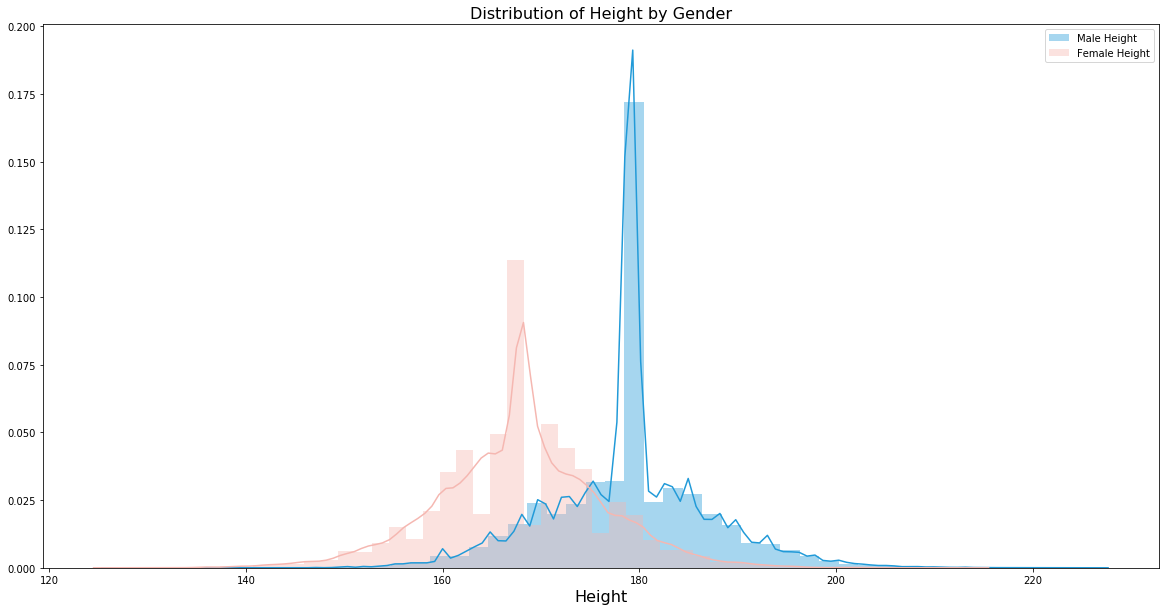

In [66]:
plt.figure(figsize=(20, 10))
sns.distplot(male_data['Height'], label='Male Height', color='#219AD8')
sns.distplot(female_data['Height'], label='Female Height', color='#F5B7B1')
plt.title('Distribution of Height by Gender', fontsize=16)
plt.xlabel('Height', fontsize=16)
plt.legend()
plt.show()

In [43]:
print('Normality of male height distribution: ', stats.normaltest(male_data.Height))
print('Normality of female height distribution: ', stats.normaltest(female_data.Height))

Normality of male height distribution:  NormaltestResult(statistic=6950.097580350797, pvalue=0.0)
Normality of female height distribution:  NormaltestResult(statistic=1329.543457816336, pvalue=1.9647459847368126e-289)


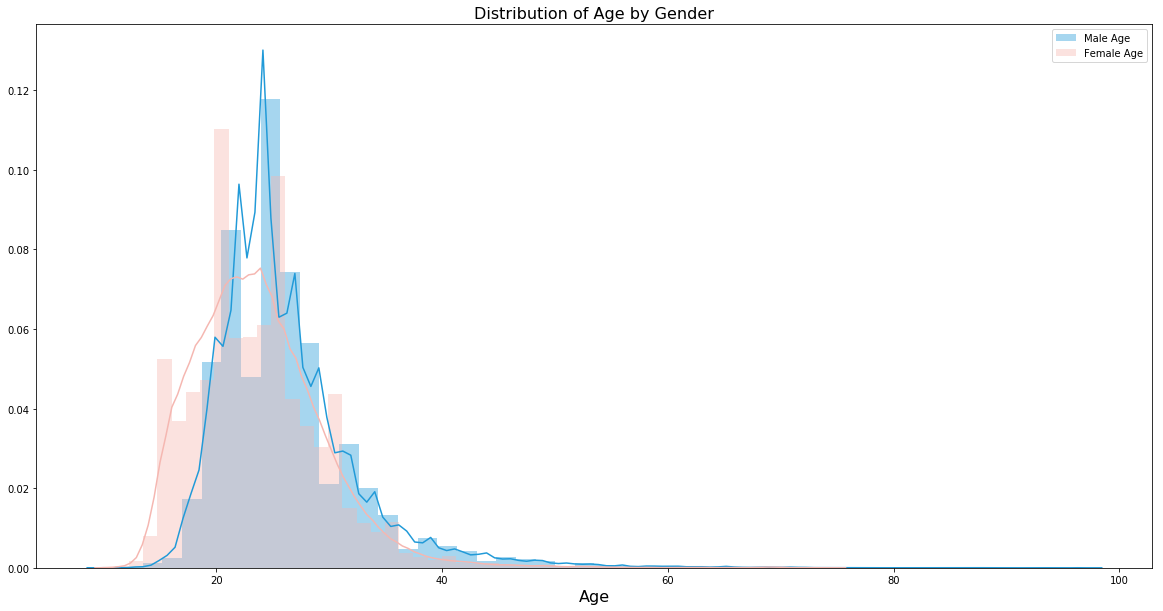

In [67]:
plt.figure(figsize=(20, 10))
sns.distplot(male_data['Age'], label='Male Age', color='#219AD8')
sns.distplot(female_data['Age'], label='Female Age', color='#F5B7B1')
plt.title('Distribution of Age by Gender', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.legend()
plt.show()

In [59]:
print('Normality of male age distribution: ', stats.normaltest(male_data.Age))
print('Normality of female age distribution: ', stats.normaltest(female_data.Age))

Normality of male age distribution:  NormaltestResult(statistic=85907.65826980455, pvalue=0.0)
Normality of female age distribution:  NormaltestResult(statistic=20192.83506012879, pvalue=0.0)


In [44]:
def get_sample(data, n):
    sample = []
    while len(sample) != n:
        x = np.random.choice(data)
        sample.append(x)
    
    return sample

def get_sample_mean(sample):
    return sum(sample) / len(sample)

def create_sample_distribution(data, dist_size=100, n=30):
    sample_dist = []
    while len(sample_dist) != dist_size:
        sample = get_sample(data, n)
        sample_mean = get_sample_mean(sample)
        sample_dist.append(sample_mean)
    
    return sample_dist

In [45]:
norm_male_weight = create_sample_distribution(male_data.Weight,5000,500)
norm_female_weight = create_sample_distribution(female_data.Weight,5000,500)

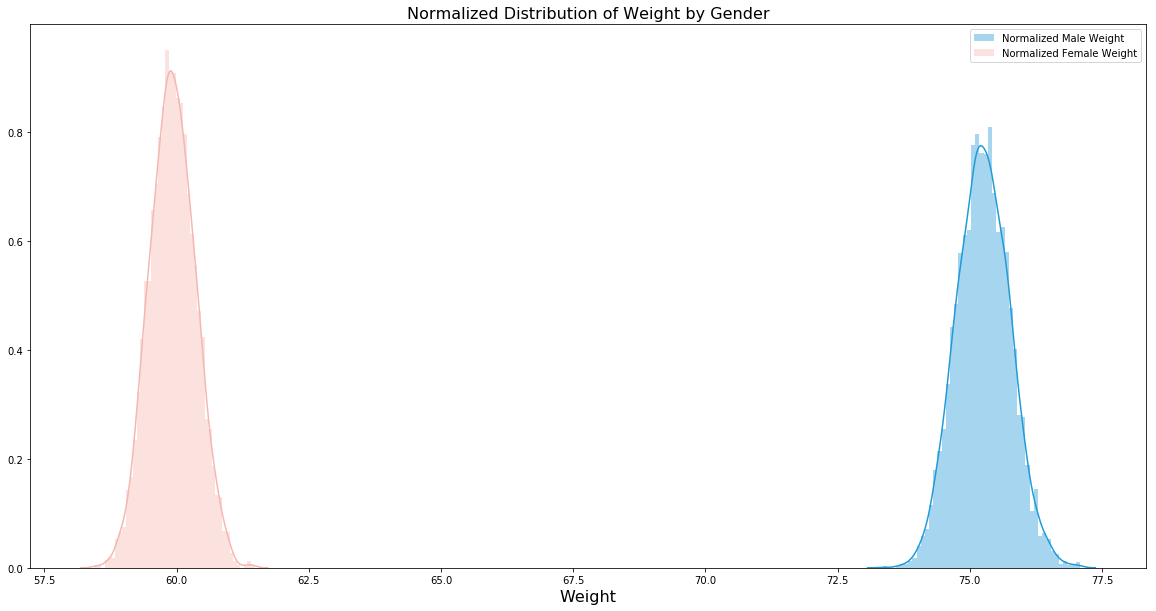

In [68]:
plt.figure(figsize=(20, 10))
sns.distplot(norm_male_weight, label='Normalized Male Weight', color='#219AD8')
sns.distplot(norm_female_weight, label='Normalized Female Weight', color='#F5B7B1')
plt.title('Normalized Distribution of Weight by Gender', fontsize=16)
plt.xlabel('Weight', fontsize=16)
plt.legend()
plt.show()

In [48]:
print('Normality of normalized male weight distribution: ', stats.normaltest(norm_male_weight))
print('Normality of normalized female weight distribution: ', stats.normaltest(norm_female_weight))

Normality of normalized male weight distribution:  NormaltestResult(statistic=7.123853154309765, pvalue=0.02838408786848723)
Normality of normalized female weight distribution:  NormaltestResult(statistic=3.6059234010156853, pvalue=0.1648100466788472)


Text(0.5, 1.0, 'Average Weight by Gender')

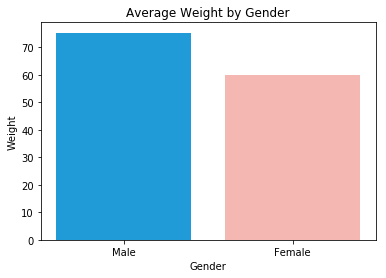

In [69]:
x = ['Male', 'Female']
y = [np.array(norm_male_weight).mean(),np.array(norm_female_weight).mean()]
plt.bar(x,y,color=('#219AD8','#F5B7B1'))
plt.ylabel('Weight')
plt.xlabel('Gender')
plt.title('Average Weight by Gender')

In [54]:
norm_male_height = create_sample_distribution(male_data.Height,5000,500)
norm_female_height = create_sample_distribution(female_data.Height,5000,500)

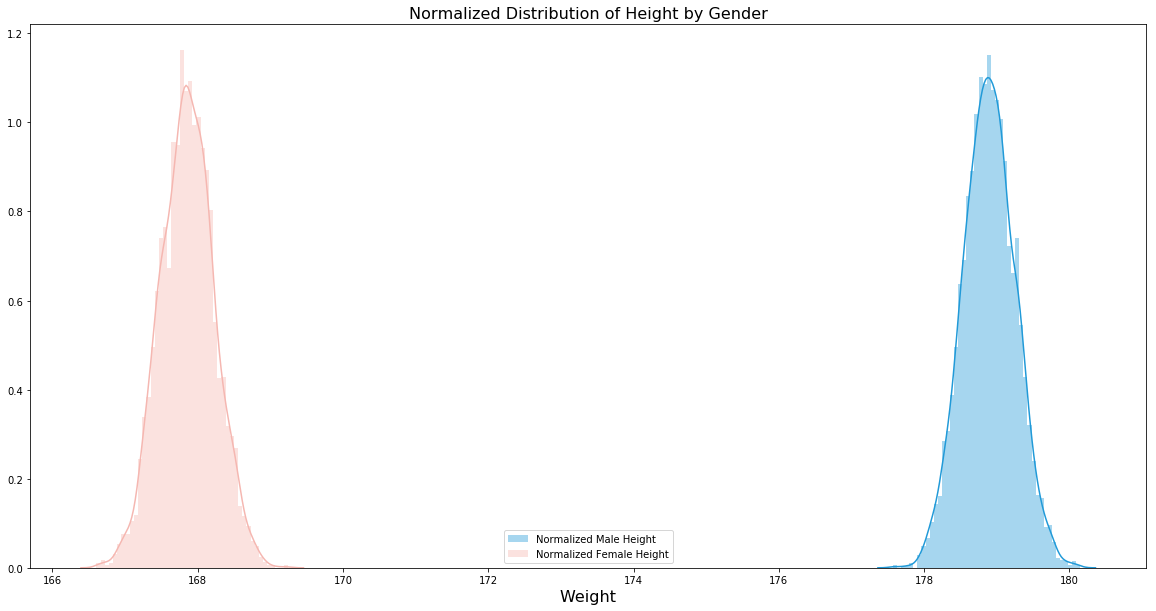

In [70]:
plt.figure(figsize=(20, 10))
sns.distplot(norm_male_height, label='Normalized Male Height', color='#219AD8')
sns.distplot(norm_female_height, label='Normalized Female Height', color='#F5B7B1')
plt.title('Normalized Distribution of Height by Gender', fontsize=16)
plt.xlabel('Weight', fontsize=16)
plt.legend()
plt.show()

In [56]:
print('Normality of normalized male height distribution: ', stats.normaltest(norm_male_height))
print('Normality of normalized female height distribution: ', stats.normaltest(norm_female_height))

Normality of normalized male height distribution:  NormaltestResult(statistic=1.6879989513368099, pvalue=0.4299873558751367)
Normality of normalized female height distribution:  NormaltestResult(statistic=0.17969653306143257, pvalue=0.9140698697419278)


Text(0.5, 1.0, 'Average Height by Gender')

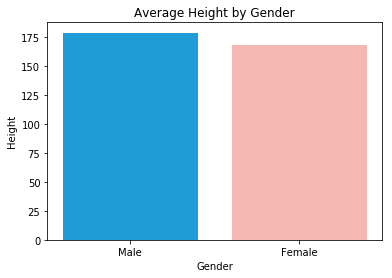

In [71]:
x = ['Male', 'Female']
y = [np.array(norm_male_height).mean(),np.array(norm_female_height).mean()]
plt.bar(x,y,color=('#219AD8','#F5B7B1'))
plt.ylabel('Height')
plt.xlabel('Gender')
plt.title('Average Height by Gender')

In [60]:
norm_male_age = create_sample_distribution(male_data.Age,5000,500)
norm_female_age = create_sample_distribution(female_data.Age,5000,500)

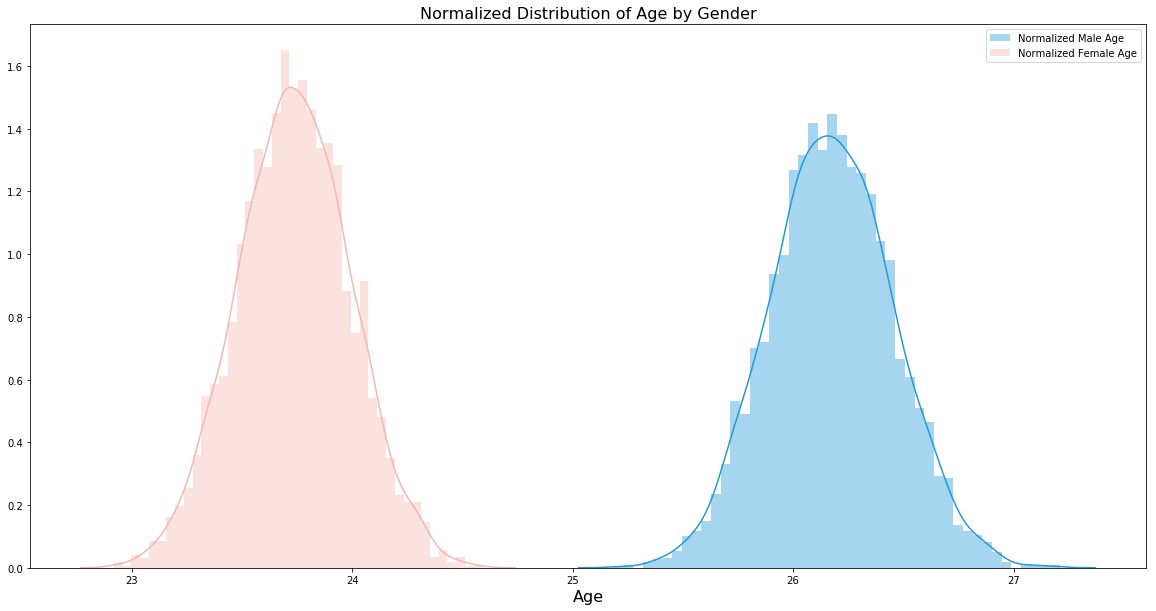

In [72]:
plt.figure(figsize=(20, 10))
sns.distplot(norm_male_age, label='Normalized Male Age', color='#219AD8')
sns.distplot(norm_female_age, label='Normalized Female Age', color='#F5B7B1')
plt.title('Normalized Distribution of Age by Gender', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.legend()
plt.show()

In [62]:
print('Normality of normalized male age distribution: ', stats.normaltest(norm_male_age))
print('Normality of normalized female age distribution: ', stats.normaltest(norm_female_age))

Normality of normalized male age distribution:  NormaltestResult(statistic=2.3776623234446492, pvalue=0.30457705741696484)
Normality of normalized female age distribution:  NormaltestResult(statistic=2.476120136875822, pvalue=0.2899461483940861)


Text(0.5, 1.0, 'Average Age by Gender')

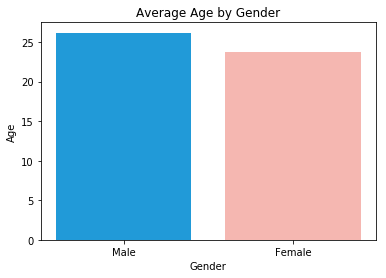

In [63]:
x = ['Male', 'Female']
y = [np.array(norm_male_age).mean(),np.array(norm_female_age).mean()]
plt.bar(x,y,color=('#219AD8','#F5B7B1'))
plt.ylabel('Age')
plt.xlabel('Gender')
plt.title('Average Age by Gender')

## How has the proportion of male and female athletes changed over time?

In [30]:
to_graph = data[['Year','Sex']]

In [31]:
to_graph = pd.get_dummies(to_graph)

In [32]:
len(to_graph)

271116

In [33]:
to_graph = to_graph.groupby(['Year']).sum()

In [34]:
to_graph.reset_index(inplace=True)

In [38]:
to_graph

,Year,Sex_F,Sex_M
0,1896,0.0,380.0
1,1900,33.0,1903.0
2,1904,16.0,1285.0
3,1906,11.0,1722.0
4,1908,47.0,3054.0
5,1912,87.0,3953.0
6,1920,134.0,4158.0
7,1924,261.0,5432.0
8,1928,437.0,5137.0
9,1932,369.0,2952.0


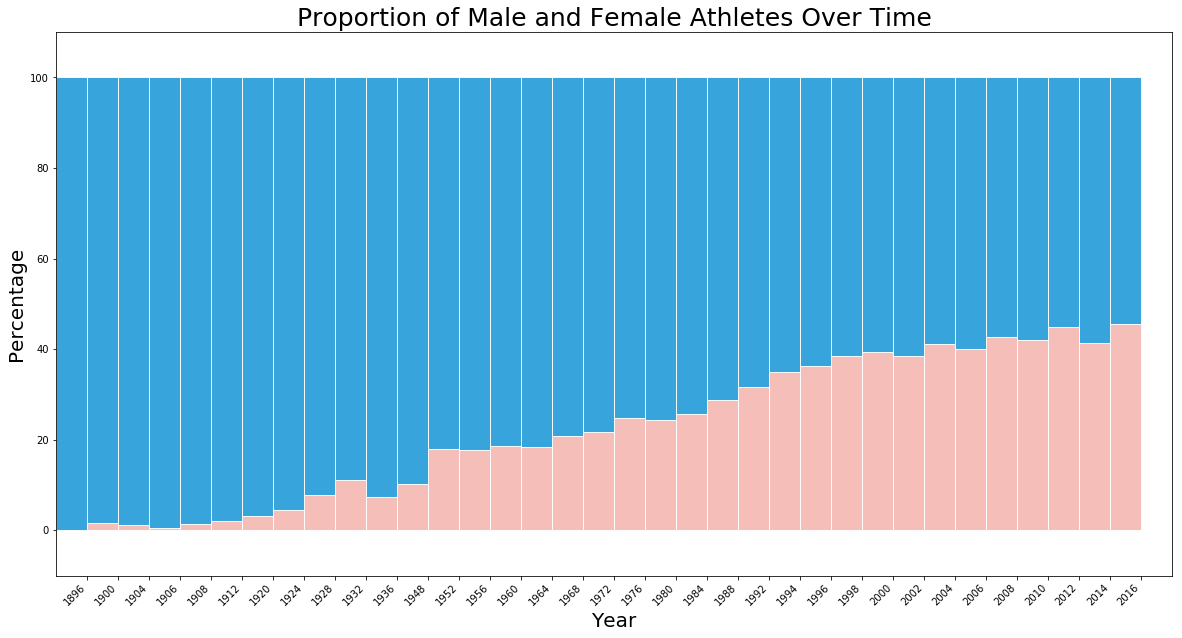

In [37]:
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(20,10))

# Set bar width at 1
bar_width = 1

# positions of the left bar-boundaries
bar_l = [i for i in range(len(to_graph['Sex_F']))] 

# positions of the x-axis ticks (center of the bars as bar labels)
tick_pos = [i+(bar_width/2) for i in bar_l] 

# Create the total score for each participant
totals = [i+j for i,j in zip(to_graph['Sex_F'], to_graph['Sex_M'])]

# Create the percentage of the total score the pre_score value for each participant was
pre_rel = [i / j * 100 for  i,j in zip(to_graph['Sex_F'], totals)]

# Create the percentage of the total score the post_score value for each participant was
post_rel = [i / j * 100 for  i,j in zip(to_graph['Sex_M'], totals)]

# Create a bar chart in position bar_1
ax.bar(bar_l,pre_rel,label='Females', alpha=0.9, color='#F5B7B1',width=bar_width,edgecolor='white')

# Create a bar chart in position bar_1
ax.bar(bar_l,post_rel,bottom=pre_rel,label='Males',alpha=0.9,color='#219AD8',width=bar_width,edgecolor='white')

# Set the ticks to be first names
plt.xticks(tick_pos, to_graph['Year'])
ax.set_ylabel("Percentage",size=20)
ax.set_xlabel("Year",size=20)
plt.title('Proportion of Male and Female Athletes Over Time',size=25)

# Let the borders of the graphic
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])
plt.ylim(-10, 110)

# rotate axis labels
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')

# shot plot
plt.show()

In [46]:
data.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
